<a href="https://colab.research.google.com/github/Diego1733/Servicio-Profesional/blob/main/Prototipo1/Servicio_Profesional_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PRIMER CÓDIGO

In [ ]:
!pip install plotly

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

Número de partículas: 1000


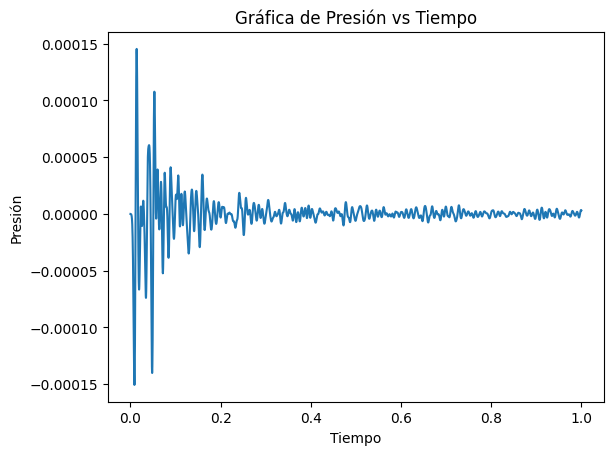

In [ ]:
# Función de presión
def pressure(ri, ti, tau, c):
  # pressure function Eq. (118) Enrique's thesis
    temporal = ti - ri / c
    return (temporal / ri ) * np.exp(-(temporal / tau)**2)

# Parámetros
pi = np.pi
vs = 1500.0      # Velocidad de propagación del sonido [micrómetros/microsegundo]
rp = 5.0         # Radio real de las partículas
rf = 100.0       # Radio del cilindro
tau0 =  rp / vs  # Pulso


# ALTURA DEL CILINDRO ES 2000!!


numeros_unicos = random.sample(range(2001), 2000)
maxpi = 1000
ntime = 5000
x = np.empty(maxpi)
y = np.empty(maxpi)
z = np.empty(maxpi)

tt = np.linspace(0, 1, ntime)
pr = np.zeros(ntime)
ri = np.zeros(maxpi)

# Nuevas variables
absorptionmax = 0.2

# Posición del sensor
xs = 0.0
ys = 0.0
zs = 2000.0   # Lo tomé como si ys, fuera la altura del cilíndro

# Inicializar el número de partículas
nparticles = 0

# Crear una matriz para almacenar los valores de rij y pr
rij_pr_values = np.empty((ntime, nparticles, 2))
for j in range(maxpi):
    if nparticles >= maxpi:
        break
    theta = 2 * pi * np.random.rand()
    R = rf * np.random.rand()
    x[nparticles] = R * np.cos(theta)
    y[nparticles] = R * np.sin(theta)
    z[nparticles] = random.choice(numeros_unicos)
    nparticles += 1

print(f'Número de partículas: {nparticles}')

for nt in range(ntime):
    pr[nt] = 0
    for n in range(nparticles):
        rij2 = (x[n] - xs) ** 2 + (y[n] - ys) ** 2 + (z[n] - zs) ** 2
        rij = np.sqrt(rij2)
        ri[n] += rij
        pr[nt] += pressure(rij, tt[nt], tau0, vs)

# Guardar datos en un archivo
data_to_save = np.vstack((tt, pr)).T
np.savetxt("pressuredat.txt", data_to_save)


# Graficar presión vs tiempo
plt.plot(tt, pr)
plt.xlabel('Tiempo')
plt.ylabel('Presión')
plt.title('Gráfica de Presión vs Tiempo')
plt.show()

## Código estructurado con Programación Orientada a Objetos

In [ ]:
class PressureSimulation:
    def __init__(self):
        # Parámetros iniciales
        self.pi = np.pi
        self.vs = 1500.0  # Velocidad de propagación del sonido [micrómetros/microsegundo]
        self.rp = 5.0     # Radio real de las partículas
        self.rf = 100.0   # Radio del cilindro
        self.tau0 = self.rp / self.vs  # Pulso
        self.maxpi = 1000
        self.ntime = 5000
        self.tt = np.linspace(0, 1, self.ntime)
        self.pr = np.zeros(self.ntime)
        self.xs = 0.0
        self.ys = 0.0
        self.zs = 2000.0  # Altura del cilindro

        # Nuevas variables
        self.absorptionmax = 0.2

        # Inicialización de arreglos
        self.x = np.empty(self.maxpi)
        self.y = np.empty(self.maxpi)
        self.z = np.empty(self.maxpi)
        self.ri = np.zeros(self.maxpi)
        self.nparticles = 0

    def pressure(self, ri, ti, tau, c):
        # Función de presión
        temporal = ti - ri / c
        return (temporal / ri) * np.exp(-(temporal / tau)**2)

    def generate_particles(self):
        numeros_unicos = random.sample(range(2001), 2000)
        for j in range(self.maxpi):
            if self.nparticles >= self.maxpi:
                break
            theta = 2 * self.pi * np.random.rand()
            R = self.rf * np.random.rand()
            self.x[self.nparticles] = R * np.cos(theta)
            self.y[self.nparticles] = R * np.sin(theta)
            self.z[self.nparticles] = random.choice(numeros_unicos)
            self.nparticles += 1

    def simulate_pressure(self):
        for nt in range(self.ntime):
            self.pr[nt] = 0
            for n in range(self.nparticles):
                rij2 = (self.x[n] - self.xs) ** 2 + (self.y[n] - self.ys) ** 2 + (self.z[n] - self.zs) ** 2
                rij = np.sqrt(rij2)
                self.ri[n] += rij
                self.pr[nt] += self.pressure(rij, self.tt[nt], self.tau0, self.vs)

    def save_data(self, filename="pressuredat.txt"):
        data_to_save = np.vstack((self.tt, self.pr)).T
        np.savetxt(filename, data_to_save)

    def plot_pressure(self):
        plt.plot(self.tt, self.pr)
        plt.xlabel('Tiempo')
        plt.ylabel('Presión')
        plt.title('Gráfica de Presión vs Tiempo')
        plt.show()

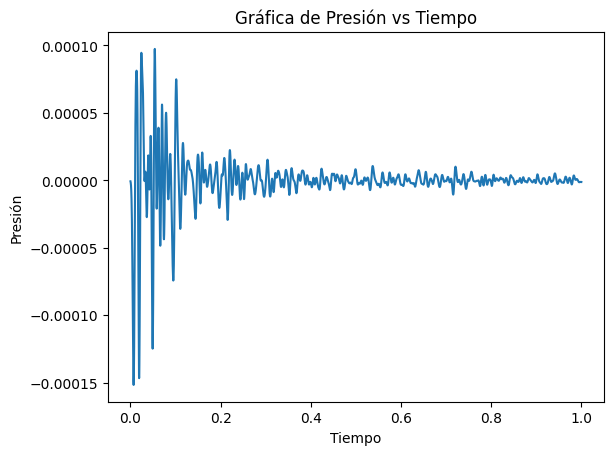

In [ ]:
simulation = PressureSimulation()
simulation.generate_particles()
simulation.simulate_pressure()
simulation.save_data()
simulation.plot_pressure()

## Ayuda visual del modelo:

In [ ]:
import plotly.graph_objects as go

# Parámetros del cilindro
cylinder_radius = 100.0
cylinder_height = 2050.0

# Crear el cilindro
z_cylinder = np.linspace(0, cylinder_height, 100)
theta_cylinder = np.linspace(0, 2 * np.pi, 100)
Z_cylinder, Theta_cylinder = np.meshgrid(z_cylinder, theta_cylinder)
X_cylinder = cylinder_radius * np.cos(Theta_cylinder)
Y_cylinder = cylinder_radius * np.sin(Theta_cylinder)

# Generar coordenadas aleatorias para partículas
num_particles = 100
x_particles = x
y_particles = y
z_particles = z

# Crear la figura
fig = go.Figure()

# Agregar superficie para el cilindro
fig.add_trace(go.Surface(x=X_cylinder, y=Y_cylinder, z=Z_cylinder, opacity=0.7, colorscale='Blues'))

# Agregar puntos para las partículas
fig.add_trace(go.Scatter3d(x=x_particles, y=y_particles, z=z_particles, mode='markers', marker=dict(size=5, color='red', opacity=1)))

# Configurar el diseño de la escena
fig.update_layout(scene=dict(aspectmode="data", aspectratio=dict(x=1, y=1, z=1)))

# Mostrar la figura interactiva
fig.show()